In [ ]:
[1]*10**10 # get more ram quickly

In [ ]:
import requests
import json
import pandas as pd
import bs4
import csv
import numpy as np

In [ ]:
from google.colab import drive
 
drive.mount('/gdrive')
# the project's folder
%cd /gdrive/'My Drive'/Movie genre prediction

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Movie genre prediction


In [ ]:
cd /gdrive/'My Drive'/Movie genre prediction

/gdrive/My Drive/Movie genre prediction


In [ ]:
table= pd.read_csv('images_to_txt.txt',header = None)

In [ ]:
table.columns =['Ids']

In [ ]:
table

,Ids
0,tt0079285
1,tt0079302
2,tt0080339
3,tt0080360
4,tt0080365
...,...
7467,tt4131188
7468,tt4137324
7469,tt4179482
7470,tt4294084


In [ ]:
for id in table['Ids'][:10]:
  print(id)

tt0079285
tt0079302
tt0080339
tt0080360
tt0080365
tt0080377
tt0080402
tt0080437
tt0080442
tt0080453


The next step is scrap imdb .com to get movies genres

In [ ]:
imdb_path= 'https://www.imdb.com/title/'
genre_dict={}

from tqdm import tqdm


In [ ]:
for id in tqdm(table['Ids']):
  page = requests.get(imdb_path +str(id))
  soup = bs4.BeautifulSoup(page.content, 'lxml')
  subtext_div =soup.find('div', {'class': 'subtext'})
  genre_list =[]
  if subtext_div.find_all('a'):
    genres = subtext_div.find_all('a')
    for genre in genres[:-1]:
      genre_list.append(genre.text.strip())
      genre_dict [id] = genre_list
  else:
    genre_list.append("N/A")
    genre_dict[id] = genre_list

100%|██████████| 7472/7472 [4:24:32<00:00,  2.12s/it]


In [ ]:
fin=[]

In [ ]:
len(genre_dict)

7461

In [ ]:
df = pd.DataFrame(list(genre_dict.items()),columns = ['Id','Genres'])
df.head(30)


,Id,Genres
0,tt0079285,"[Adventure, Horror, Sci-Fi]"
1,tt0079302,[Comedy]
2,tt0080339,[Comedy]
3,tt0080360,"[Horror, Sci-Fi, Thriller]"
4,tt0080365,"[Crime, Drama, Mystery]"
5,tt0080377,"[Action, Comedy]"
6,tt0080402,[Horror]
7,tt0080437,"[Drama, War]"
8,tt0080442,"[Comedy, Crime, Drama]"
9,tt0080453,"[Adventure, Drama, Romance]"


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
multilabel_encoded_results= mlb.fit_transform(df['Genres'])
mlb.classes_


array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype=object)

In [ ]:
df_ = pd.DataFrame(multilabel_encoded_results, columns=mlb.classes_)
# Viewing few rows of data
df_.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df= pd.concat([df,df_],axis=1)
print(df.head(30))
print(df.shape)

           Id                          Genres  Action  ...  Thriller  War  Western
0   tt0079285     [Adventure, Horror, Sci-Fi]       0  ...         0    0        0
1   tt0079302                        [Comedy]       0  ...         0    0        0
2   tt0080339                        [Comedy]       0  ...         0    0        0
3   tt0080360      [Horror, Sci-Fi, Thriller]       0  ...         1    0        0
4   tt0080365         [Crime, Drama, Mystery]       0  ...         0    0        0
5   tt0080377                [Action, Comedy]       1  ...         0    0        0
6   tt0080402                        [Horror]       0  ...         0    0        0
7   tt0080437                    [Drama, War]       0  ...         0    1        0
8   tt0080442          [Comedy, Crime, Drama]       0  ...         0    0        0
9   tt0080453     [Adventure, Drama, Romance]       0  ...         0    0        0
10  tt0080455      [Adventure, Comedy, Crime]       0  ...         0    0        0
11  

In [ ]:
#df.to_csv ('genre.csv', index = False, header=True)

In [ ]:
data = pd.read_csv('/gdrive/My Drive/Movie genre prediction/genre.csv')    # reading the csv file
data.head()

,Id,Genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0079285,"['Adventure', 'Horror', 'Sci-Fi']",0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,tt0079302,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0080339,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0080360,"['Horror', 'Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0080365,"['Crime', 'Drama', 'Mystery']",0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(7461, 26)

In [ ]:
df =data

In [ ]:
from tqdm import tqdm

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.regularizers import l2
from keras.optimizers import RMSprop
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
img_width = 224
img_height = 224

X = []

for i in tqdm(range(df.shape[0])):
  path = '/gdrive/My Drive/Movie genre prediction/images/' + df['Id'][i] + '.jpg'
  image = load_img(path, target_size=(img_width, img_height, 3))
  image = img_to_array(image)
  image = preprocess_input(image)
  
  X.append(image)

  

X = np.array(X)

100%|██████████| 7461/7461 [00:39<00:00, 191.07it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(7461, 224, 224, 3)


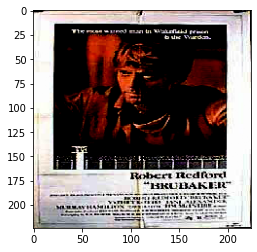

In [ ]:
print(X.shape)
plt.imshow(X[14])

In [ ]:
data =df
data.head(20)

,Id,Genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0079285,"['Adventure', 'Horror', 'Sci-Fi']",0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,tt0079302,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt0080339,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0080360,"['Horror', 'Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0080365,"['Crime', 'Drama', 'Mystery']",0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,tt0080377,"['Action', 'Comedy']",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,tt0080402,['Horror'],0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,tt0080437,"['Drama', 'War']",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,tt0080442,"['Comedy', 'Crime', 'Drama']",0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,tt0080453,"['Adventure', 'Drama', 'Romance']",0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
data.shape

(7461, 26)

In [ ]:
label = data.drop(['Id', 'Genres'],axis=1)
label = label.to_numpy()
label.shape

(7461, 24)

In [ ]:
label

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, label, random_state = 34, test_size = 0.20)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [ ]:
from keras.applications import VGG16

# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

# Re-loads the VGG16 model without the top or FC layers
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
#for layer in vgg16.layers:
 # layer.trainable = False

for layer in vgg16.layers[15:]:
  layer.trainable = True

In [ ]:
def build(baseModel, classes, D):
  # initialize the head model that will be placed on top of
  # the base, then add a FC layer
  headModel = baseModel.output
  headModel = Flatten(name="flatten")(headModel)
  headModel = Dense(D, activation="relu")(headModel)
  headModel = Dropout(0.5)(headModel)
  headModel = Dense(classes, activation="sigmoid")(headModel)
  
  return headModel

In [ ]:
headModel = build(vgg16,24, 128)
model = Model(inputs=vgg16.input, outputs=headModel)

In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
	aug.flow(X_train, Y_train, batch_size=32),
	steps_per_epoch=len(X_train) // 32,
	validation_data=(X_test, Y_test),
	validation_steps=len(X_test) // 32,
	epochs=100,
  verbose=0)

In [ ]:
model.save('model_multilabel.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/gdrive/My Drive/Movie genre prediction/model_multilabel.h5')

Documentary
Drama
Biography


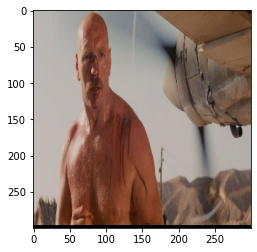

In [ ]:
image = load_img('/gdrive/My Drive/Movie genre prediction/test_images/cat1.jpg', target_size=(img_width, img_height, 3))
plt.imshow(image)
image = img_to_array(image)
image = preprocess_input(image)

image = image.reshape(1, img_width, img_height, 3)

classes = df.columns[2:]

preds = model.predict(image)
top_3_proba = np.argsort(preds[0])[:-4:-1]

for i in range(3):
  print(classes[top_3_proba[i]])

Documentary
Biography
Drama


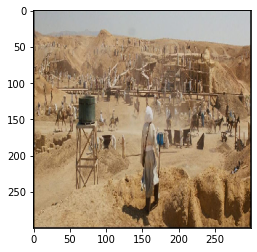

In [ ]:
image = load_img('/gdrive/My Drive/Movie genre prediction/test_images/cat2.jpg', target_size=(img_width, img_height, 3))
plt.imshow(image)
image = img_to_array(image)
image = preprocess_input(image)

image = image.reshape(1, img_width, img_height, 3)

classes = df.columns[2:]
preds = model.predict(image)
top_3_proba = np.argsort(preds[0])[:-4:-1]

for i in range(3):
  print(classes[top_3_proba[i]])